<a href="https://colab.research.google.com/github/Muhammad-Taufiq-Khan/ML-Kidney-Disease-Diagnosis/blob/main/Notebook%20Kidney%20Disease%20Diagnosis%20(Feature_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 0: Setup dependencies

## 0.1 Install Dependencies

In [246]:
# ! pip install -U pandas-profiling

## 0.2 Import Dependencies

In [247]:
import time
notebook_strtime = time.time()

import numpy as np
from numpy import mean
from numpy import std

import pandas as pd
pd.set_option('display.max_columns', None)
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.style as style
style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer #import Knn Imputer
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline


#Importing Classification Models
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from joblib import dump, load

import warnings
warnings.filterwarnings(action='ignore')

## 0.3 Fetch Dataset

In [248]:
#Fetch Data from my GitHub Repo
url = "https://raw.githubusercontent.com/Muhammad-Taufiq-Khan/ML-Kidney-Disease-Diagnosis/main/kidney_disease.csv"
dataframe = pd.read_csv(url)
dataframe.sample(10)

id   age    bp     sg   al   su       rbc        pc         pcc  \
120  120  72.0  90.0  1.025  1.0  3.0       NaN    normal  notpresent   
336  336  25.0  60.0  1.020  0.0  0.0    normal    normal  notpresent   
293  293  50.0   NaN  1.020  0.0  0.0    normal    normal  notpresent   
180  180  73.0  90.0  1.010  1.0  4.0  abnormal  abnormal     present   
365  365  24.0  80.0  1.020  0.0  0.0    normal    normal  notpresent   
55    55  35.0  80.0  1.005  3.0  0.0  abnormal    normal  notpresent   
312  312  80.0  70.0  1.020  0.0  0.0    normal    normal  notpresent   
329  329  33.0  60.0  1.025  0.0  0.0    normal    normal  notpresent   
357  357  66.0  70.0  1.025  0.0  0.0    normal    normal  notpresent   
250  250  40.0  80.0  1.025  0.0  0.0    normal    normal  notpresent   

             ba    bgr    bu   sc    sod  pot  hemo  pcv     wc   rc htn   dm  \
120  notpresent  323.0  40.0  2.2  137.0  5.3  12.6  NaN    NaN  NaN  no  yes   
336  notpresent  119.0  27.0  0.5    NaN  NaN  15.2   40   9200  5.2  no   no   
293  notpresent   92.0  19.0  1.2  150.0  4.8  14.9   48   4700  5.4  no   no   
180  notpresent  234.0  56.0  1.9    NaN  NaN  10.3   28    NaN  NaN  no  yes   
365  notpresent   93.0  46.0  1.0  145.0  3.5   NaN  NaN  10700  6.3  no   no   
55   notpresent    NaN   NaN  NaN    NaN  NaN   9.5   28    NaN  NaN  no   no   
312  notpresent    NaN   NaN  NaN  135.0  4.1  15.3   48   6300  6.1  no   no   
329  notpresent   80.0  25.0  0.9  146.0  3.5  14.1   48   7800  5.1  no   no   
357  notpresent  107.0  16.0  1.1  140.0  3.6  13.6   42  11000  4.9  no   no   
250  notpresent  140.0  10.0  1.2  135.0  5.0  15.0   48  10400  4.5  no   no   

     cad appet   pe ane classification  
120  yes  poor   no  no            ckd  
336   no  good   no  no         notckd  
293   no  good   no  no         notckd  
180   no  good   no  no            ckd  
365   no  good   no  no         notckd  
55    no  good  yes  no            ckd  
312   no  good   no  no         notckd  
329   no  good   no  no         notckd  
357   no  good   no  no         notckd  
250   no  good   no  no         notckd

In [249]:
#Rename Each Column
dataframe.columns = ["id","age", "blood_pressure", "specific_gravety", "albumin","sugar" ,"red_blood_cells", "pus_cell", "pus_cell_clumps", "bacteria", "blood_glucose_random", "blood _urea", "serum_creatinine", "sodium", "potassium", "hemoglobine", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count", "hypertension", "diabetes_mellitias", "coronary_artery_disease", "appetite", "pedal_edema", "anemia", "ckd" ]


In [250]:
def execution_duration(strtime):
    endtime = time.time()
    duration = endtime-strtime
    print(f"execution time: {round(duration,3)}s")

# Chapter 1: Exploratory Data Analysis

In [251]:
# profile = ProfileReport(dataframe, title="CKD Dataset EDA Report")
# profile.to_file("EDA_report.html")

# Chapter 2: Cleaning data

In [252]:
def clean_dataset(dataframe):
    strtime = time.time()
    #Fix typing mistakes
    # Col: 20
    dataframe["diabetes_mellitias"]= dataframe["diabetes_mellitias"].map({'yes':'yes','no':'no',' yes':'yes', '\tno':'no', '\tyes':'yes'})
    # Col 21
    dataframe["coronary_artery_disease"]= dataframe["coronary_artery_disease"].map({'yes':'yes','no':'no', '\tno':'no'})
    # col 25
    dataframe["ckd"]= dataframe["ckd"].map({'ckd':'ckd','ckd\t':'ckd', 'notckd':'notckd'})

    for i in range(dataframe.shape[0]):
        # packed_cell_volume
        if dataframe.iloc[i,16]=='\t?':
            dataframe.iloc[i,16]=np.nan
        if dataframe.iloc[i,16]=='\t43':
            dataframe.iloc[i,16]='43'
        # white_blood_cell_count
        if dataframe.iloc[i,17]=='\t?':
            dataframe.iloc[i,17]=np.nan
        if dataframe.iloc[i,17]=='\t6200':
            dataframe.iloc[i,17]= '6200'
        if dataframe.iloc[i,17]=='\t8400':
            dataframe.iloc[i,17]= '6200'
        # red_blood_cell_count
        if dataframe.iloc[i,18]=='\t?':
            dataframe.iloc[i,18]=np.nan

    # ##Show Unique values per Attribute
    # for i in (dataframe):
    #     print(f"Attribute Name: {i}   Total Unique Value: {dataframe[i].nunique()} \n Unique Values: {dataframe[i].unique()}\n")

    # #Drop ID column as it's not needed further
    # dataframe.drop('id',axis=1,inplace=True)


    # Some numerical features are mistyped as strings.
    mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
    # Storing Neumerical data into numeric list
    numeric=[]
    for i in dataframe.columns:
        if dataframe[i].dtype=='float64':
            numeric.append(i)
    numeric=numeric+mistyped
    # Storing Categorical feature's into a list.
    categoricals=[]
    for col in dataframe.columns:
        if not col in numeric:
            categoricals.append(col)
    categoricals.remove('ckd')

    for col in mistyped:
            dataframe[col]=dataframe[col].astype('float')
    
    execution_duration(strtime)

    return dataframe


df = dataframe.copy()
clean_df = clean_dataset(df)
clean_df.info()

execution time: 0.069s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravety         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood _urea              381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  pot

# Chapter 3: Splitting Dataset

In [253]:
y = clean_df["ckd"]
X = clean_df.copy()
X.drop(['id', 'ckd'], axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 24) (100, 24) (300,) (100,)


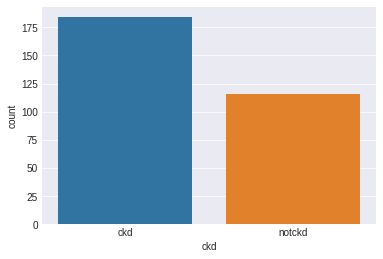

In [254]:
sns.countplot(x=y_train)

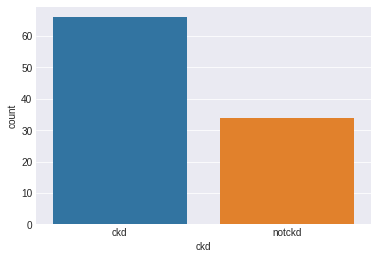

In [255]:
sns.countplot(x=y_test)

# Chapter 4: Preprocessing

## 4.1 Encoding

In [256]:
def EncodingTrain(Xtrain, ytrain):
    strtime = time.time()
    ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    label_enc = LabelEncoder()
    categoricals = Xtrain.select_dtypes(include=object)
    numericals = Xtrain.select_dtypes(include=['int64','float64'])
    numericals.reset_index(drop=True, inplace=True)
    enc_categoricals = ordinal_enc.fit_transform(categoricals)
    enc_ytrain = label_enc.fit_transform(ytrain)
    enc_categoricals_df = pd.DataFrame(enc_categoricals, columns = list(categoricals.columns))
    enc_Xtrain = pd.concat([numericals, enc_categoricals_df], axis=1)

    execution_duration(strtime)
    return enc_Xtrain, enc_ytrain, ordinal_enc, label_enc

enc_Xtrain, enc_ytrain, ordinal_enc, label_enc = EncodingTrain(X_train, y_train)
enc_Xtrain.shape, enc_ytrain.shape

execution time: 0.016s


((300, 24), (300,))

In [257]:
def EncodingTest(ordinal_enc, label_enc, Xtest, ytest):
    strtime = time.time()
    categoricals = Xtest.select_dtypes(include=object)
    numericals = Xtest.select_dtypes(include=['int64','float64'])
    numericals.reset_index(drop=True, inplace=True)
    enc_categoricals = ordinal_enc.transform(categoricals)
    enc_ytest = label_enc.transform(ytest)
    enc_categoricals_df = pd.DataFrame(enc_categoricals, columns = list(categoricals.columns))
    enc_Xtest = pd.concat([numericals, enc_categoricals_df], axis=1)

    execution_duration(strtime)
    return enc_Xtest, enc_ytest
enc_Xtest, enc_ytest = EncodingTest(ordinal_enc, label_enc, X_test, y_test)
print(enc_Xtest.shape, enc_ytest.shape)

execution time: 0.008s
(100, 24) (100,)


## 4.2 Normalization

In [258]:
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(enc_Xtrain)
X_test = normalizer.transform(enc_Xtest)
X_train.shape, X_test.shape

((300, 24), (100, 24))

## 4.3 Imputation

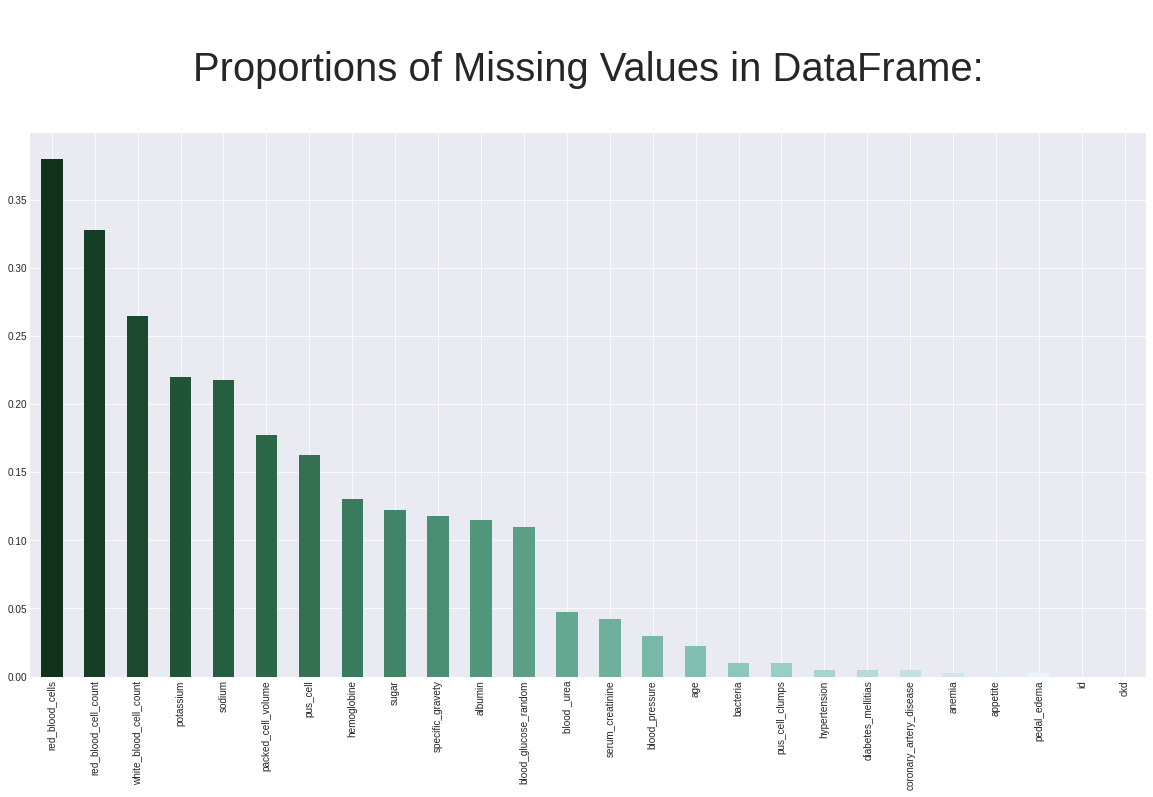

In [259]:
data = clean_df.copy()
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values in DataFrame:\n",fontsize=40)
plt.show()

In [260]:
imputer = KNNImputer(n_neighbors = 5) #Declaring that 15 nearest neighbour should be decided
imputer.fit(X_train) #fitting imputer according to Training Features (X_train)

X_train = imputer.transform(X_train) #Appling Imputation
X_test = imputer.transform(X_test) #Appling Imputation
X_train.shape, X_test.shape

((300, 24), (100, 24))

## 4.4 Outlier Detection and removing

Outlier Detection and Removal from Training Dataset
(300, 24) (300,)
(262, 24) (262,)


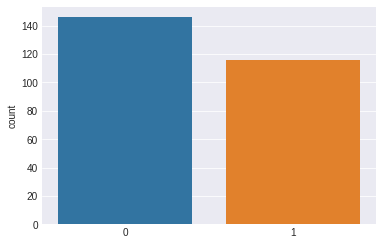

In [261]:
# summarize the shape of the training dataset
print("Outlier Detection and Removal from Training Dataset")
print(X_train.shape, enc_ytrain.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)
yhat = lof.predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], enc_ytrain[mask]

# summarize the shape of the updated testing dataset
print(X_train.shape, y_train.shape)
sns.countplot(x=y_train)

## 4.5 Over Sampling



(292, 24) (292,)


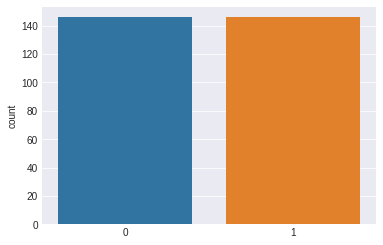

In [262]:
oversample = SMOTE()
Xtrain, ytrain = oversample.fit_resample(X_train, y_train)
print(Xtrain.shape, ytrain.shape)
sns.countplot(x=ytrain)

# Chapter 5: Validation

In [263]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
models = [SVC(), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          LogisticRegression(), 
          KNeighborsClassifier(), 
          GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          XGBClassifier()]
          
def Validate(models):
    for model in models:
        strtime = time.time()
        name = str(model)
        steps = list()
        steps.append((name, model))
        pipeline = Pipeline(steps=steps)
        # evaluate the model using cross-validation
        scores = cross_val_score(pipeline, Xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
        # report performance
        print(f"\nModel: {name}---------------")
        print('Accuracy: %.5f (%.5f)' % (mean(scores)*100, std(scores)*100))
        execution_duration(strtime)
        
Validate(models)


Model: SVC()---------------
Accuracy: 97.84368 (2.29909)
execution time: 0.48s

Model: GaussianNB()---------------
Accuracy: 97.94713 (2.36033)
execution time: 0.166s

Model: DecisionTreeClassifier()---------------
Accuracy: 99.62299 (1.17816)
execution time: 0.197s

Model: RandomForestClassifier()---------------
Accuracy: 99.65632 (1.03109)
execution time: 11.878s

Model: LogisticRegression()---------------
Accuracy: 97.39770 (2.60823)
execution time: 0.72s

Model: KNeighborsClassifier()---------------
Accuracy: 98.28736 (2.13722)
execution time: 0.241s

Model: GradientBoostingClassifier()---------------
Accuracy: 99.62299 (1.17816)
execution time: 6.245s

Model: AdaBoostClassifier()---------------
Accuracy: 99.62529 (1.06601)
execution time: 6.899s

Model: XGBClassifier()---------------
Accuracy: 100.00000 (0.00000)
execution time: 2.908s


# Chapter 6: Hyerparameter Optimization

In [269]:
SVM  =  SVC()
GNB  =  GaussianNB()
DT   =  DecisionTreeClassifier()
RF   =  RandomForestClassifier() 
LR   =  LogisticRegression()
KNN  =  KNeighborsClassifier() 
GB   =  GradientBoostingClassifier()
AB   =  AdaBoostClassifier() 
XGB  =  XGBClassifier()

estimators_dict = {
    SVM:{
    'C':range(1,4), 
    'kernel':('rbf','linear','poly', 'sigmoid'), 
    'degree':range(1,7), 
    'gamma': ('scale','auto'),
    'decision_function_shape': ('ovo', 'ovr')
    },

    LR:{
    'C':range(1,4), 
    'penalty':('l1','l2', 'None'), 
    'solver': ('lbfgs','liblinear', 'newton-cg', 'newton-cholesky')
    },

    KNN:{
    'n_neighbors' : range(7,30,2),
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'p': [1,2]
    },
            
    DT:{
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter' : ('best', 'random'),
    'max_features' : ('auto', 'sqrt', 'log2', 'none')
    },
        
    RF:{
    'n_estimators': range(50, 201, 50),
    'criterion': ('gini', 'entropy', 'log_loss'),
    'max_features' : ('auto', 'sqrt', 'log2', 'none')
    },
    
    GB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'criterion': ('friedman_mse', 'squared_error'),
    'max_features': ('auto', 'sqrt', 'log2')
    },

    AB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'algorithm': ('SAMME', 'SAMME.R')
    },

    XGB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'booster': ('gbtree','dart')
    }
}

def Optimization(estimators_dict: dict, Xtrain, ytrain):
    optimized_models = []
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    for estimator,param_grid in estimators_dict.items():
        print(estimator)
        strtime = time.time()
        clf = GridSearchCV(estimator = estimator, 
                        param_grid = param_grid, 
                        cv=rskf, 
                        n_jobs=5,
                        verbose=1,
                        scoring = 'accuracy', 
                        return_train_score=True).fit(Xtrain, ytrain)

        print(clf.best_score_, clf.best_estimator_)
        execution_duration(strtime)
        print()
        optimized_models.append(clf.best_estimator_)
    return optimized_models

optimized_estimators = Optimization(estimators_dict, Xtrain, ytrain)

SVC()
Fitting 25 folds for each of 288 candidates, totalling 7200 fits
0.9890473407364115 SVC(C=1, decision_function_shape='ovo', degree=6, kernel='poly')
execution time: 24.015s

LogisticRegression()
Fitting 25 folds for each of 36 candidates, totalling 900 fits
0.9815663354763297 LogisticRegression(C=3)
execution time: 1.974s

KNeighborsClassifier()
Fitting 25 folds for each of 192 candidates, totalling 4800 fits
0.9829222676797196 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
execution time: 34.343s

DecisionTreeClassifier()
Fitting 25 folds for each of 24 candidates, totalling 600 fits
0.9897603740502631 DecisionTreeClassifier(max_features='log2')
execution time: 0.749s

RandomForestClassifier()
Fitting 25 folds for each of 48 candidates, totalling 1200 fits
0.9972530683810638 RandomForestClassifier(max_features='log2', n_estimators=50)
execution time: 123.069s

GradientBoostingClassifier()
Fitting 25 folds for each of 168 candidates, totalling 4200 fits
0.9979427235

# Chapter 7: Testing and Evaluattion

In [270]:
for estimator in optimized_estimators:
    print(estimator.__class__.__name__, estimator)

SVC SVC(C=1, decision_function_shape='ovo', degree=6, kernel='poly')
LogisticRegression LogisticRegression(C=3)
KNeighborsClassifier KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
DecisionTreeClassifier DecisionTreeClassifier(max_features='log2')
RandomForestClassifier RandomForestClassifier(max_features='log2', n_estimators=50)
GradientBoostingClassifier GradientBoostingClassifier(learning_rate=0.03, max_features='auto',
                           n_estimators=50)
AdaBoostClassifier AdaBoostClassifier(learning_rate=0.01)
XGBClassifier XGBClassifier(learning_rate=0.03)


SVC(C=1, decision_function_shape='ovo', degree=6, kernel='poly')
execution time: 0.014s
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.92      1.00      0.96        34

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



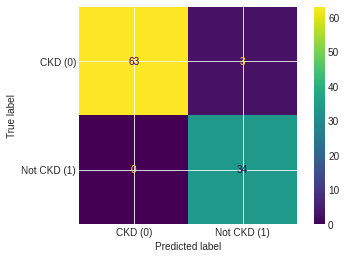


LogisticRegression(C=3)
execution time: 0.021s
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.89      1.00      0.94        34

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



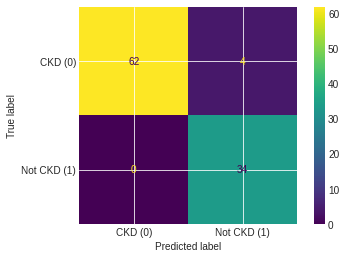


KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
execution time: 0.012s
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.87      1.00      0.93        34

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



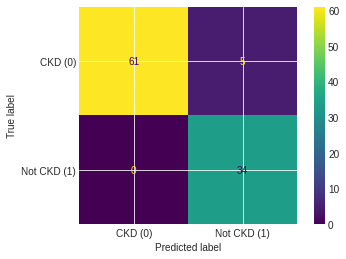


DecisionTreeClassifier(max_features='log2')
execution time: 0.012s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



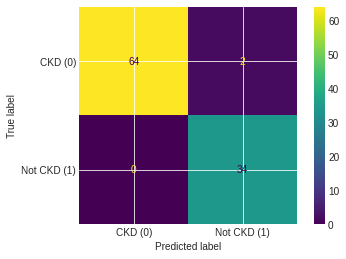


RandomForestClassifier(max_features='log2', n_estimators=50)
execution time: 0.127s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



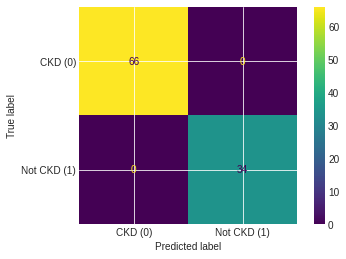


GradientBoostingClassifier(learning_rate=0.03, max_features='auto',
                           n_estimators=50)
execution time: 0.059s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



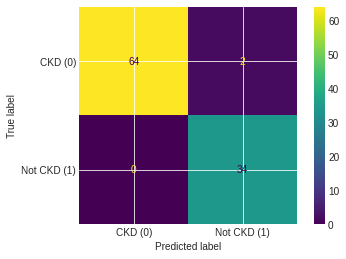


AdaBoostClassifier(learning_rate=0.01)
execution time: 0.124s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.97      0.97      0.97        34

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



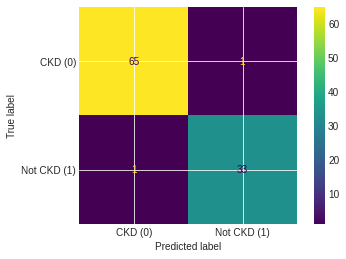


XGBClassifier(learning_rate=0.03)
execution time: 0.049s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



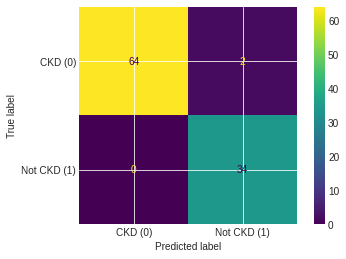

In [271]:
def Evaluation(estimator, Xtrain, ytrain, X_test, y_test):
    strtime=time.time()
    print(estimator)
    estimator.fit(Xtrain, ytrain)
    pred = estimator.predict(X_test)
    score = accuracy_score(y_test,pred)
    # print(int(score*100))
    report = classification_report(y_test,pred)
    cm = confusion_matrix(y_test, pred, labels=estimator.classes_)
    filename = str(X_test.shape[1])+"_"+str(estimator.__class__.__name__)+"_"+str(int(score*100))
    dump(estimator, filename)
    execution_duration(strtime)
    print(report)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['CKD (0)', 'Not CKD (1)'])
    disp.plot()
    plt.show()

for estimator in optimized_estimators:
    Evaluation(estimator, Xtrain, ytrain, X_test, enc_ytest)
    print()

In [272]:
notebook_endtime = execution_duration(notebook_strtime)

execution time: 1979.555s
